# IMAGE CLASSIFICATION - DEEP LEARNING

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## I downloaded this dataset from Kaggle. It only provided the train and test sets, so I moved some images from the train set to a new folder, in order to have a validation set as well. 
## Then I created the variables below to save their directories.

In [18]:
train_dir="/Users/davidepiccoli/Desktop/archive/seg_train/seg_train"
valid_dir="/Users/davidepiccoli/Desktop/archive/seg_valid"
test_dir="/Users/davidepiccoli/Desktop/archive/seg_test/seg_test"

## I wanted to start with deep learning and thus using a convolutional neural network as a classifier. 
## First of all, I made sure that all the images had the same shape before importing them, imposing fixed values for their height and their width. 
## Then I created an ImageDataGenerator to augment and preprocess the imported images. This was useful in order to apply soe changes to the iages, making sure that the model would still be able to recognize the landscape it is observing.

In [23]:
image_height=224
image_width=224
batch_size=32

# Create an ImageDataGenerator for data augmentation and preprocessing
datagen=ImageDataGenerator(
    rescale=1.0/255.0,          # Rescale pixel values to [0, 1]
    rotation_range=15,          # Randomly rotate images by up to 15 degrees
    width_shift_range=0.1,      # Randomly shift the width of images
    height_shift_range=0.1,     # Randomly shift the height of images
    shear_range=0.2,            # Shear transformations
    zoom_range=0.2,             # Zoom in randomly
    horizontal_flip=True,       # Randomly flip images horizontally
    fill_mode="nearest"         # Fill in missing pixels with the nearest value
)

# Load and preprocess images using the ImageDataGenerator
train_data_gen=datagen.flow_from_directory(
    train_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

valid_data_gen=datagen.flow_from_directory(
    valid_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

test_data_gen=datagen.flow_from_directory(
    test_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='categorical'  
)

Found 11017 images belonging to 6 classes.
Found 3017 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## At this point, I made different attempts with convolutional neural networks having different topologies. The one performing the best one the validation set was then applied to the test set to get the resulting accuracy.

## Attempt #1
## The first attempt involved a simple CNN, with only a convolutional layer with 32 3x3-shaped filters for the feature learning structure. As for the classification structure of the CNN, I chose a layer made up of 128 nodes fully connected to the 6 output nodes. 
## The chosen activation function was ReLU inside the CNN, in order to speed up convergence. On the other hand, the sfotmax activation function was implemented in the output layer in order to make sure the CNN prediction values sum up to 1.
## The learning rate was set to the default value of the ADAM optimizer (0.001).

In [26]:
# Create and compile a simple convolutional neural network (CNN) model
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


## The CNN was trained on 10 epochs on the training set by using the accuracy score on the validation set as a benchmark.

In [27]:
history=model.fit(
    train_data_gen,
    epochs=10,
    validation_data=valid_data_gen
)

Epoch 1/10
345/345 [==============================] - 542s 2s/step - loss: 2.3027 - accuracy: 0.5691 - val_loss: 0.9563 - val_accuracy: 0.6500
Epoch 2/10
345/345 [==============================] - 733s 2s/step - loss: 0.9348 - accuracy: 0.6595 - val_loss: 0.9045 - val_accuracy: 0.6725
Epoch 3/10
345/345 [==============================] - 1015s 3s/step - loss: 0.8711 - accuracy: 0.6864 - val_loss: 0.8799 - val_accuracy: 0.6679
Epoch 4/10
345/345 [==============================] - 533s 2s/step - loss: 0.8332 - accuracy: 0.7006 - val_loss: 0.8516 - val_accuracy: 0.6858
Epoch 5/10
345/345 [==============================] - 568s 2s/step - loss: 0.8191 - accuracy: 0.7035 - val_loss: 0.7570 - val_accuracy: 0.7196
Epoch 6/10
345/345 [==============================] - 574s 2s/step - loss: 0.7816 - accuracy: 0.7202 - val_loss: 0.7824 - val_accuracy: 0.7143
Epoch 7/10
345/345 [==============================] - 581s 2s/step - loss: 0.7617 - accuracy: 0.7252 - val_loss: 0.7672 - val_accuracy: 0.722

## Here I wanted to visualize the different trends related to the loss and accuracy metrics, both on the training and the validation sets.

In [44]:
train_loss=list(history.history["loss"])
train_accuracy=list(history.history["accuracy"])

val_loss=list(history.history["val_loss"])
val_accuracy=list(history.history["val_accuracy"])

Text(0, 0.5, 'Accuracy')

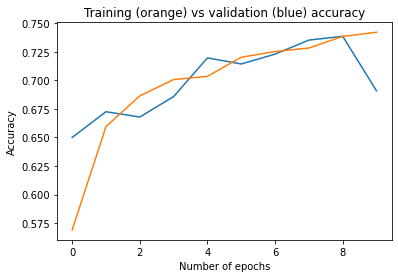

In [48]:
plt.plot(val_accuracy)
plt.plot(train_accuracy)
plt.title("Training (orange) vs validation (blue) accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

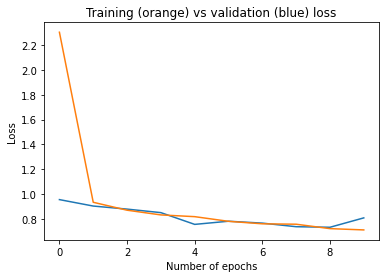

In [49]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.title("Training (orange) vs validation (blue) loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

## Both the trends on the different sets have similar behaviors, suggesting that the overfitting problem was avoided. The resulting plots are not very regular, but still a trend can be observed. Anyway, I felt like a maximum of 0.73 as accuracy score on the validation set could be improved, thus some additional attempts were made by tuning the hyperparameters of the model.

## Before hyperparamter tuning, I wanted to see this model in action with a tangible example, so I reloaded a random image from the validation set in order to see how the model would classify it.

1/1 [==============================] - 0s 68ms/step


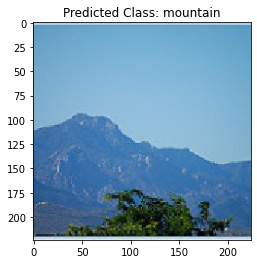

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the image
image_path="/Users/davidepiccoli/Desktop/archive/seg_valid/mountain/3849.jpg"  
image=tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
image=tf.keras.preprocessing.image.img_to_array(image)
image=np.expand_dims(image, axis=0)
image=image / 255.0  # Normalize the pixel values to [0, 1]

# Use the trained model to make predictions
predictions=model.predict(image)

# Get the predicted class label
predicted_class_index=np.argmax(predictions)
class_names=["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class = class_names[predicted_class_index]  

# Display the image and the predicted class
plt.imshow(image[0])
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

## In the case above, the model worked fine. However the image was quite clear and easy to interpret. What about a more confusing input?

1/1 [==============================] - 0s 78ms/step


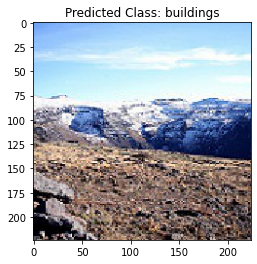

In [54]:
# Load and preprocess the image
image_path="/Users/davidepiccoli/Desktop/archive/seg_valid/mountain/3850.jpg"  
image=tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
image=tf.keras.preprocessing.image.img_to_array(image)
image=np.expand_dims(image, axis=0)
image=image / 255.0  # Normalize the pixel values to [0, 1]

# Use the trained model to make predictions
predictions=model.predict(image)

# Get the predicted class label
predicted_class_index=np.argmax(predictions)
class_names=["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class=class_names[predicted_class_index]  

# Display the image and the predicted class
plt.imshow(image[0])
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

## In the case above, the quality of the image was worse and indeed the model misclassifed it. 

1/1 [==============================] - 0s 78ms/step


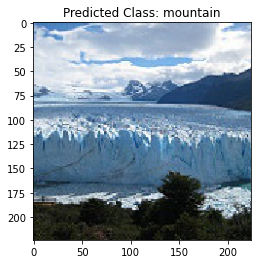

In [55]:
# Load and preprocess the image
image_path="/Users/davidepiccoli/Desktop/archive/seg_valid/glacier/3902.jpg"  
image=tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
image=tf.keras.preprocessing.image.img_to_array(image)
image=np.expand_dims(image, axis=0)
image=image / 255.0  # Normalize the pixel values to [0, 1]

# Use the trained model to make predictions
predictions=model.predict(image)

# Get the predicted class label
predicted_class_index=np.argmax(predictions)
class_names=["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class=class_names[predicted_class_index]  

# Display the image and the predicted class
plt.imshow(image[0])
plt.title(f"Predicted Class: {predicted_class}")
plt.show()

## This is another example of misclassification. In this case, the correct label should have been "glacier". 
## At this point, I wanted to understand what made the model think about mountains. For this reason, I decided to implement Grad-CAM, an explainability method which provides a heatmap showing regions with the most significant influence on a prediction of a model.

1/1 [==============================] - 0s 70ms/step


/var/folders/jy/36zwwdh52ng42mzs1hc5r_5m0000gn/T/ipykernel_80359/3606508046.py:41: RuntimeWarning: invalid value encountered in divide
  cam = cam / cam.max()  # Normalize to [0, 1]
/var/folders/jy/36zwwdh52ng42mzs1hc5r_5m0000gn/T/ipykernel_80359/3606508046.py:44: RuntimeWarning: invalid value encountered in cast
  heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)


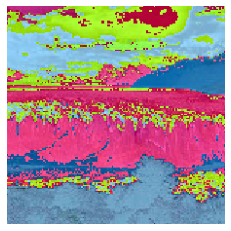

In [130]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2

# Load and preprocess an image 
image_path='/Users/davidepiccoli/Desktop/archive/seg_valid/glacier/3902.jpg'
img=image.load_img(image_path, target_size=(224, 224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
img=tf.keras.applications.vgg16.preprocess_input(img)

# Get the class prediction
preds=model.predict(img)
predicted_class_index=np.argmax(preds)
class_names=["buildings", "forest", "glacier", "mountain", "sea", "street"]
predicted_class=class_names[predicted_class_index]  


# Get the output tensor of the last convolutional layer
last_conv_layer=model.get_layer(index=0)

# Create a model that maps the input image to the activations of the last conv layer
grad_model=tf.keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

# Compute the gradients of the predicted class with regard to the activations in the last conv layer
with tf.GradientTape() as tape:
    conv_outputs, predictions=grad_model(img)
    loss=predictions[:, class_idx]

# Get the gradients
grads=tape.gradient(loss, conv_outputs)[0]

# Compute the CAM
cam=np.mean(conv_outputs[0] * grads, axis=(0, 1))

# Resize the CAM to match the original image size
cam=cv2.resize(cam, (224, 224))
cam=np.maximum(cam, 0)  # Ensure non-negativity
cam=cam/cam.max()  # Normalize to [0, 1]

# Apply the heatmap to the original image
heatmap=cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
superimposed_img=np.uint8(255 * img[0] + heatmap * 0.001)  # Adjust heatmap intensity

# Display the original image with the superimposed heatmap
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

## The red regions are those which were considered the most by the classifier. It actually considered the glacier, but was probably led into error by the mountains in the background.

## Attempt #2
## First of all I focused on the filter size. This parameter was updated from 3x3 to 5x5, while the other ones remained unchanged.

In [60]:
# Create and compile a simple convolutional neural network (CNN) model
model_2=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [61]:
history_2=model_2.fit(
    train_data_gen,
    epochs=10,
    validation_data=valid_data_gen
)

Epoch 1/10
345/345 [==============================] - 604s 2s/step - loss: 2.4660 - accuracy: 0.5236 - val_loss: 1.0992 - val_accuracy: 0.5704
Epoch 2/10
345/345 [==============================] - 717s 2s/step - loss: 1.0019 - accuracy: 0.6304 - val_loss: 0.9557 - val_accuracy: 0.6344
Epoch 3/10
345/345 [==============================] - 682s 2s/step - loss: 0.9250 - accuracy: 0.6623 - val_loss: 0.9816 - val_accuracy: 0.6424
Epoch 4/10
345/345 [==============================] - 690s 2s/step - loss: 0.8945 - accuracy: 0.6713 - val_loss: 0.9345 - val_accuracy: 0.6639
Epoch 5/10
345/345 [==============================] - 588s 2s/step - loss: 0.8632 - accuracy: 0.6827 - val_loss: 0.8628 - val_accuracy: 0.6748
Epoch 6/10
345/345 [==============================] - 669s 2s/step - loss: 0.8253 - accuracy: 0.6947 - val_loss: 0.9025 - val_accuracy: 0.6818
Epoch 7/10
345/345 [==============================] - 685s 2s/step - loss: 0.8150 - accuracy: 0.7059 - val_loss: 0.8231 - val_accuracy: 0.7040

## Implementing a filter with size 5x5 did not improve the performance on the validation set, so I decided to move back to the initial model, this time increasing its learning rate from the default value of ADAM optimizer (0.001) up to 0.01.

## Attempt #3. 

In [62]:
# Create and compile a simple convolutional neural network (CNN) model
model_3=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)

model_3.compile(optimizer=custom_optimizer,
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [63]:
history_3=model_3.fit(
    train_data_gen,
    epochs=10,
    validation_data=valid_data_gen
)

Epoch 1/10
345/345 [==============================] - 541s 2s/step - loss: 4.7090 - accuracy: 0.4045 - val_loss: 1.3169 - val_accuracy: 0.4325
Epoch 2/10
345/345 [==============================] - 542s 2s/step - loss: 1.2459 - accuracy: 0.4803 - val_loss: 1.2205 - val_accuracy: 0.5061
Epoch 3/10
345/345 [==============================] - 677s 2s/step - loss: 1.2164 - accuracy: 0.4971 - val_loss: 1.2048 - val_accuracy: 0.5247
Epoch 4/10
345/345 [==============================] - 590s 2s/step - loss: 1.2121 - accuracy: 0.5020 - val_loss: 1.1920 - val_accuracy: 0.4945
Epoch 5/10
345/345 [==============================] - 566s 2s/step - loss: 1.1805 - accuracy: 0.5190 - val_loss: 1.2189 - val_accuracy: 0.5048
Epoch 6/10
345/345 [==============================] - 582s 2s/step - loss: 1.1889 - accuracy: 0.5108 - val_loss: 1.1872 - val_accuracy: 0.5015
Epoch 7/10
345/345 [==============================] - 536s 2s/step - loss: 1.1691 - accuracy: 0.5265 - val_loss: 1.1309 - val_accuracy: 0.5413

## Tuning the filter size first and the learning rate then did not lead to any improvement. At this point I decided to focus on the CNN architecture, making it more complex by adding a convolutional layer and doubling the number of filters in both of them (from 32 to 64).

## Attempt #4

In [64]:
# Create and compile a simple convolutional neural network (CNN) model
model_4=tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(image_height, image_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

In [65]:
history_4=model_4.fit(
    train_data_gen,
    epochs=10,
    validation_data=valid_data_gen
)

Epoch 1/10
345/345 [==============================] - 977s 3s/step - loss: 1.1521 - accuracy: 0.5892 - val_loss: 0.8605 - val_accuracy: 0.6772
Epoch 2/10
345/345 [==============================] - 986s 3s/step - loss: 0.8142 - accuracy: 0.6955 - val_loss: 0.7866 - val_accuracy: 0.7140
Epoch 3/10
345/345 [==============================] - 983s 3s/step - loss: 0.7060 - accuracy: 0.7422 - val_loss: 0.7014 - val_accuracy: 0.7478
Epoch 4/10
345/345 [==============================] - 981s 3s/step - loss: 0.6482 - accuracy: 0.7615 - val_loss: 0.6265 - val_accuracy: 0.7693
Epoch 5/10
345/345 [==============================] - 963s 3s/step - loss: 0.6165 - accuracy: 0.7773 - val_loss: 0.6822 - val_accuracy: 0.7441
Epoch 6/10
345/345 [==============================] - 957s 3s/step - loss: 0.5591 - accuracy: 0.7978 - val_loss: 0.6038 - val_accuracy: 0.7879
Epoch 7/10
345/345 [==============================] - 954s 3s/step - loss: 0.5708 - accuracy: 0.7930 - val_loss: 0.5873 - val_accuracy: 0.7875

## This model significantly improved the performance observed so far, reaching an accuracy score equal to 0.81 on the validation set. 
## The different trends related to the loss and accuracy metrics can be observed below, both on the training and the validation sets.

In [67]:
train_loss=list(history_4.history["loss"])
train_accuracy=list(history_4.history["accuracy"])

val_loss=list(history_4.history["val_loss"])
val_accuracy=list(history_4.history["val_accuracy"])

Text(0, 0.5, 'Accuracy')

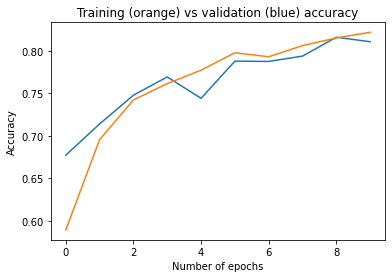

In [68]:
plt.plot(val_accuracy)
plt.plot(train_accuracy)
plt.title("Training (orange) vs validation (blue) accuracy")
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Loss')

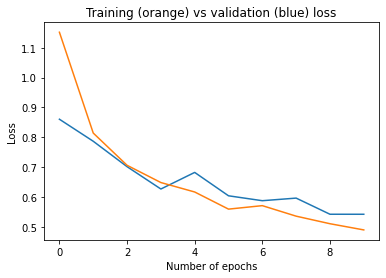

In [69]:
plt.plot(val_loss)
plt.plot(train_loss)
plt.title("Training (orange) vs validation (blue) loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")

## The small gap between the metrics on the training set and those on the validation set suggests that the model does not overfit the data. I would have probably met this problem if I had decided to make the CNN architecture even more complex, so I decided to keep this model as the ultimate one and I implemented it on the test set to get the final accuracy score.

In [66]:
test_loss, test_accuracy=model_4.evaluate(test_data_gen)
print(f"Test accuracy: {test_accuracy}")

94/94 [==============================] - 84s 892ms/step - loss: 0.5459 - accuracy: 0.8057
Test accuracy: 0.8056666851043701


## The deep learning method achieved an accuracy score equal to 0.80 on the test set. Thus, it is able to correclty classify roughly 80% of the images it is given.

## Before moving on to machine learning and see which of the two performs the best, I wanted to focus on the interpretability of the ultimate CNN.
## An analysis of the ultimate model through Grad-CAM can be observed below. 

In [71]:
pip install tf-keras-vis

pip install opencv-python

#######

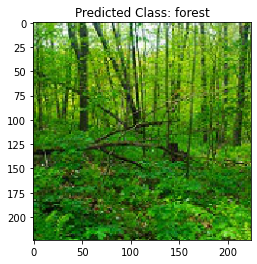

In [135]:
# Load and preprocess the image
image_path="/Users/davidepiccoli/Desktop/archive/seg_test/seg_test/forest/20252.jpg"  
image=tf.keras.preprocessing.image.load_img(image_path, target_size=(image_height, image_width))
image=tf.keras.preprocessing.image.img_to_array(image)
image=np.expand_dims(image, axis=0)
image=image / 255.0  # Normalize the pixel values to [0, 1]

# Display the image 
plt.imshow(image[0])
plt.title(f"Predicted Class: {pred_class}")
plt.show()

## For example, the model correctly classified this image. Let's see which regions were the most influential on this prediction.

1/1 [==============================] - 0s 120ms/step


/var/folders/jy/36zwwdh52ng42mzs1hc5r_5m0000gn/T/ipykernel_80359/287923890.py:41: RuntimeWarning: invalid value encountered in divide
  cam = cam / cam.max()  # Normalize to [0, 1]
/var/folders/jy/36zwwdh52ng42mzs1hc5r_5m0000gn/T/ipykernel_80359/287923890.py:44: RuntimeWarning: invalid value encountered in cast
  heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)


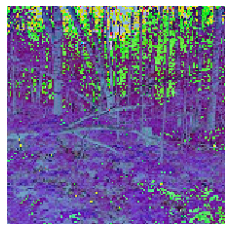

In [134]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2

# Load and preprocess an image 
image_path='/Users/davidepiccoli/Desktop/archive/seg_test/seg_test/forest/20252.jpg'
img=image.load_img(image_path, target_size=(224, 224))
img=image.img_to_array(img)
img=np.expand_dims(img, axis=0)
img=tf.keras.applications.vgg16.preprocess_input(img)

# Get the class prediction
preds=model_4.predict(img)
predicted_class_index=np.argmax(predictions)
class_names=["buildings", "forest", "glacier", "mountain", "sea", "street"]
pred_class=class_names[predicted_class_index]  


# Get the output tensor of the last convolutional layer
last_conv_layer=model_4.get_layer(index=1)

# Create a model that maps the input image to the activations of the last conv layer
grad_model=tf.keras.models.Model([model_4.inputs], [last_conv_layer.output, model_4.output])

# Compute the gradients of the predicted class with regard to the activations in the last conv layer
with tf.GradientTape() as tape:
    conv_outputs, predictions=grad_model(img)
    loss=predictions[:, class_idx]

# Get the gradients
grads=tape.gradient(loss, conv_outputs)[0]

# Compute the CAM
cam=np.mean(conv_outputs[0] * grads, axis=(0, 1))

# Resize the CAM to match the original image size
cam=cv2.resize(cam, (224, 224))
cam=np.maximum(cam, 0)  # Ensure non-negativity
cam=cam / cam.max()  # Normalize to [0, 1]

# Apply the heatmap to the original image
heatmap=cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
superimposed_img=np.uint8(255 * img[0] + heatmap * 0.001)  # Adjust heatmap intensity

# Display the original image with the superimposed heatmap
plt.imshow(superimposed_img)
plt.axis('off')
plt.show()

## The darker regions are those mostly considered by the model. 

## That's all for deep learning, let's see if the performance is improved or worsened by machine learning.

## IMAGE CLASSIFICATION - MACHINE LEARNING

## All these machine learning algorithms cannot be directly implemented on images. 
## Thus the first step involved using the best deep learning model obtained previously in order to extract the main features from each image. Then each feature vector was reshaped to a 1D array, such that they could be compatible inputs for the following machine learning models.

In [148]:
from sklearn.ensemble import RandomForestClassifier

# Extract features using the trained model
train_features=model_4.predict(train_data_gen)
valid_features=model_4.predict(valid_data_gen)
test_features=model_4.predict(test_data_gen)

# Reshape features to fit the input of the Random Forest classifier
train_features=train_features.reshape(train_features.shape[0], -1)
valid_features=valid_features.reshape(valid_features.shape[0], -1)
test_features=test_features.reshape(test_features.shape[0], -1)


94/94 [==============================] - 98s 1s/step


## RANDOM FOREST CLASSIFIER

## Hyperparameter tuning was implemented through GridSearch. 
## The parameters involved were the total number of estimators, their maximum depth, the minimum number of samples required to split their internal nodes and the minimum number of samples required to be at their leaf nodes.
## Cross-validation was implemented during the training phase. The final accuracy score was computed on the validation set previously prepared. The model having this score as the highest will be then selected and applied to the test set, in order to get the final score for machine learning algorithms.

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid to search
param_grid={
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Create a Random Forest classifier
rf_classifier=RandomForestClassifier(random_state=42)

# Create the GridSearchCV object
grid_search=GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(train_features, train_data_gen.classes)

# Get the best hyperparameters
best_params=grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_rf_model=grid_search.best_estimator_

# Make predictions on the validation data using the best model
y_pred=best_rf_model.predict(valid_features)

# Calculate accuracy
accuracy=accuracy_score(valid_data_gen.classes, y_pred)
print("Validation Accuracy:", accuracy)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.15976135233675837


## As stated by the output above, the best performance was obtained by the model with 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200. 
## The validation accuracy score was almost 0.16: very low.

## ADABOOST

## Here, the hyperparameter tuning implemented by GridSearch involved the number of estimators and the weight applied to each classifier at each boosting iteration.

In [153]:
from sklearn.ensemble import AdaBoostClassifier

# Define the parameter grid to search
param_grid={
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
}

# Create an AdaBoost classifier
adaboost_classifier=AdaBoostClassifier(random_state=42)

# Create the GridSearchCV object with cv=1
grid_search=GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(train_features, train_data_gen.classes)

# Get the best hyperparameters
best_params=grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_adaboost_model=grid_search.best_estimator_

# Make predictions on the validation data using the best model
y_pred=best_adaboost_model.predict(valid_features)

# Calculate accuracy
accuracy=accuracy_score(valid_data_gen.classes, y_pred)
print("Validation Accuracy:", accuracy)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Hyperparameters: {'learning_rate': 0.1, 'n_estimators': 50}
Validation Accuracy: 0.1726881007623467


## In this case, the model performing the best was the one with 'learning_rate': 0.1, 'n_estimators': 50. However, the final accuracy score on the validation set is again very small: 0.17.

## KNN 

## KNN was implemented with different values related to the number of neighbors to consider and the weight function used in prediction ('uniform' means that all points in each neighborhood are weighted equally, while 'distance' means that closer neighbors of a query point will have a greater influence than neighbors which are further away.

In [156]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid to search
param_grid={
    'n_neighbors': [10, 50, 100],
    'weights': ['uniform', 'distance'],
}

# Create a KNN classifier
knn_classifier=KNeighborsClassifier()

# Create the GridSearchCV object with cv=1
grid_search=GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(train_features, train_data_gen.classes)

# Get the best hyperparameters
best_params=grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_knn_model=grid_search.best_estimator_

# Make predictions on the validation data using the best model
y_pred=best_knn_model.predict(valid_features)

# Calculate accuracy
accuracy=accuracy_score(valid_data_gen.classes, y_pred)
print("Validation Accuracy:", accuracy)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Hyperparameters: {'n_neighbors': 10, 'weights': 'distance'}
Validation Accuracy: 0.15909844216108718
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   6.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=  25.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   9.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  23.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=  14.6s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.7s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.2s
[CV] END 

## The best parameters were 'n_neighbors': 10 and 'weights': 'distance', leading to an accuracy score equal to 0.16 roughly on the validation set.

## SUPPORT VECTOR CLASSIFIER

## The hyperparameter tuning regarded theegularization parameter, inversely proportional to the strength of the regularization, as well as the kernel (either linear or rbf) such that the classifer could be able to deal with non-linearly separable data.

In [155]:
from sklearn.svm import SVC

# Define the parameter grid to search
param_grid={
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
}

# Create an SVC classifier
svc_classifier=SVC()

# Create the GridSearchCV object with cv=1
grid_search=GridSearchCV(estimator=svc_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(train_features, train_data_gen.classes)

# Get the best hyperparameters
best_params=grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from grid search
best_svc_model=grid_search.best_estimator_

# Make predictions on the validation data using the best model
y_pred=best_svc_model.predict(valid_features)

# Calculate accuracy
accuracy=accuracy_score(valid_data_gen.classes, y_pred)
print("Validation Accuracy:", accuracy)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Hyperparameters: {'C': 0.1, 'kernel': 'rbf'}
Validation Accuracy: 0.16241299303944315


## As expected, the rbf kernel performed better than the linear one on this kind of data. The final accuracy score on the vaidation set was 0.16

## At this point, I choice the model which performed the best among these four, Adaboost, and I applied it on the test set in order to get a final score for the machine learning side.

In [157]:
# Make predictions on the validation data using the best model
y_pred=best_adaboost_model.predict(test_features)

# Calculate accuracy
accuracy=accuracy_score(test_data_gen.classes, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.16966666666666666


## So, each machine learning model performed very poorly on this dataset. Indeed their final result on the test set is about 0.17 as accuracy score.
## This is totally normal, since this is not the kind of data that these models were designed for. 
## Deep learning is much more helpful in this matter. A CNN can grasp image inputs much more easily. Also, it provides explainability tools in order to dig in its final predictions and understand what led it to classify a certain image in a certain way. 
## To sum up, I would say that the main reasons why deep learning performed better than machine learning in this case are the following:
## - deep learning can understand very complex patterns more easily (feature learning through convolutional layers, for example)
## - deep learning can operate more efficiently on very large datasets
## - deep learning can handle raw data, such as these images, while machine learning needs it to be well-structured and preprocessed.
## - deep learning is simply much more suitable for complex tasks compared to machine learning.